# Wine Quality Classifier

<p><b>Status: <span style=color:orange;>In process</span></b></p>

##### LOAD THE FEATURE DATA

In [1]:
import pandas as pd
import numpy as np

X = pd.read_csv('../../02-data-preprocessing/output/preprocessed_data/X.csv', sep=',')

print ('Feature data, shape:\nX: {}'.format(X.shape))
X.head()

Feature data, shape:
X: (178, 13)


,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


##### DATA OVERVIEW

In [2]:
y = pd.read_csv('../../02-data-preprocessing/output/preprocessed_data/y.csv', sep=',')

print ('Target data, shape:\ny: {}'.format(X.shape))
y.head()

Target data, shape:
y: (178, 13)


,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


##### SPLIT THE DATA

In [3]:
from sklearn.model_selection import train_test_split

# set the seed for reproducibility
np.random.seed(127)

# split the dataset into 2 training and 2 testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=13)

print('Data shapes:\n')
print('X_train : {}\ny_train : {}\n\nX_test : {}\ny_test : {}'.format(np.shape(X_train),
                                                                      np.shape(y_train),
                                                                      np.shape(X_test),
                                                                      np.shape(y_test)))

Data shapes:

X_train : (142, 13)
y_train : (142, 3)

X_test : (36, 13)
y_test : (36, 3)


##### DEFINE NETWORK PARAMETERS

In [4]:
# define number of attributes
n_features = X_train.shape[1]    
n_classes = y_train.shape[1]

# count number of samples in each set of data
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# define amount of neurons
n_layer_in = n_features  # 11 neurons in input layer
n_layer_h1 = 50          # first   hidden layer
n_layer_h2 = 50          # second  hidden layer
n_layer_out = n_classes  # 7 neurons in input layer

sigma_init = 0.01   # For randomized initialization

##### MODEL ARCHITECTURE

In [5]:
from keras.models import Sequential
from keras.layers import Dense

# fix random seed for reproducibility
np.random.seed(42)

# define model architecture
model = Sequential()
model.add(Dense(n_layer_h1, activation='relu', input_shape=(n_features,)))
model.add(Dense(n_layer_h2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

# add model's configuration
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# show model architecture
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 153       
Total params: 3,403
Trainable params: 3,403
Non-trainable params: 0
_________________________________________________________________


##### EXECUTE THE MODEL

In [6]:
from tensorflow.keras.callbacks import History 

# add history function to 
history = History()
model.fit(X_train, y_train, epochs=100, callbacks=[history])

Epoch 1/100
142/142 [==============================] - 0s 939us/step - loss: 0.9972 - acc: 0.4930
Epoch 2/100
142/142 [==============================] - 0s 28us/step - loss: 0.7102 - acc: 0.8873
Epoch 3/100
142/142 [==============================] - 0s 28us/step - loss: 0.5539 - acc: 0.9366
Epoch 4/100
142/142 [==============================] - 0s 28us/step - loss: 0.4459 - acc: 0.9507
Epoch 5/100
142/142 [==============================] - 0s 28us/step - loss: 0.3625 - acc: 0.9577
Epoch 6/100
142/142 [==============================] - 0s 35us/step - loss: 0.2950 - acc: 0.9718
Epoch 7/100
142/142 [==============================] - 0s 35us/step - loss: 0.2438 - acc: 0.9718
Epoch 8/100
142/142 [==============================] - 0s 28us/step - loss: 0.2029 - acc: 0.9789
Epoch 9/100
142/142 [==============================] - 0s 28us/step - loss: 0.1686 - acc: 0.9859
Epoch 10/100
142/142 [==============================] - 0s 28us/step - loss: 0.1412 - acc: 0.9859
Epoch 11/100
142/142 [======

142/142 [==============================] - 0s 28us/step - loss: 7.2995e-07 - acc: 1.0000
Epoch 84/100
142/142 [==============================] - 0s 21us/step - loss: 6.3383e-07 - acc: 1.0000
Epoch 85/100
142/142 [==============================] - 0s 21us/step - loss: 5.2301e-07 - acc: 1.0000
Epoch 86/100
142/142 [==============================] - 0s 28us/step - loss: 4.6341e-07 - acc: 1.0000
Epoch 87/100
142/142 [==============================] - 0s 28us/step - loss: 4.2857e-07 - acc: 1.0000
Epoch 88/100
142/142 [==============================] - 0s 28us/step - loss: 3.7820e-07 - acc: 1.0000
Epoch 89/100
142/142 [==============================] - 0s 21us/step - loss: 3.0978e-07 - acc: 1.0000
Epoch 90/100
142/142 [==============================] - 0s 28us/step - loss: 2.7704e-07 - acc: 1.0000
Epoch 91/100
142/142 [==============================] - 0s 21us/step - loss: 2.6151e-07 - acc: 1.0000
Epoch 92/100
142/142 [==============================] - 0s 21us/step - loss: 2.3422e-07 - acc: 

##### PRINTING RAW OUTPUT

In [7]:
predictions = model.predict(X_test)
predictions

array([[3.05300407e-09, 1.75886655e-07, 9.99999762e-01],
       [1.00000000e+00, 2.61890444e-17, 4.85437208e-15],
       [5.38089484e-13, 3.61498619e-14, 1.00000000e+00],
       [8.53482270e-13, 1.00000000e+00, 4.07490204e-14],
       [8.01561768e-12, 1.00000000e+00, 7.17284982e-14],
       [9.63445317e-17, 1.00000000e+00, 2.77696178e-17],
       [2.55443999e-09, 4.74595030e-10, 1.00000000e+00],
       [9.99999881e-01, 7.47529825e-08, 8.66261063e-10],
       [1.93064114e-15, 1.00000000e+00, 1.14737632e-15],
       [1.29270789e-14, 1.00000000e+00, 3.62889794e-15],
       [1.00000000e+00, 8.86494756e-17, 1.51385805e-15],
       [1.00000000e+00, 3.78907244e-18, 5.75204813e-18],
       [1.52164685e-13, 2.75670274e-13, 1.00000000e+00],
       [2.30998976e-13, 1.00000000e+00, 7.01144693e-15],
       [7.41000794e-13, 8.40749180e-16, 1.00000000e+00],
       [3.09228199e-09, 1.00000000e+00, 1.07695623e-11],
       [1.62959544e-13, 1.00000000e+00, 4.50117205e-14],
       [1.00000000e+00, 4.56760

##### EVALUATE TESTING SET

In [8]:
# Evaluate the model on the test data using `evaluate`
results = model.evaluate(X_test, y_test)

print('\nEvaluate on test data \n\n(loss), (accuracy) :\n{}'.format(results))

36/36 [==============================] - 0s 1ms/step

Evaluate on test data 

(loss), (accuracy) :
[0.000225788913667202, 1.0]


##### PRINTING RESULTS

In [9]:
dataframe = pd.DataFrame(np.argmax(predictions,1), columns=['Prediction'])
dataframe['Target'] = np.argmax(y_test, 1)
dataframe['Hit'] = np.equal(dataframe.Target, dataframe.Prediction)
print('\n\nPrinting results :\n\n', dataframe)



Printing results :

     Prediction  Target   Hit
0            2       2  True
1            0       0  True
2            2       2  True
3            1       1  True
4            1       1  True
5            1       1  True
6            2       2  True
7            0       0  True
8            1       1  True
9            1       1  True
10           0       0  True
11           0       0  True
12           2       2  True
13           1       1  True
14           2       2  True
15           1       1  True
16           1       1  True
17           0       0  True
18           0       0  True
19           1       1  True
20           2       2  True
21           1       1  True
22           0       0  True
23           0       0  True
24           2       2  True
25           1       1  True
26           2       2  True
27           1       1  True
28           0       0  True
29           2       2  True
30           1       1  True
31           1       1  True
32           0      

In [10]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


##### VISUALIZE THE RESULTS

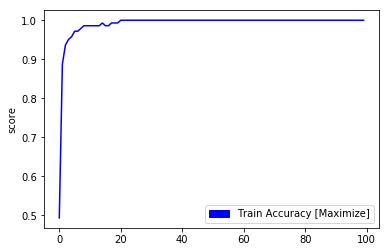

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# set up legend
blue_patch = mpatches.Patch(color='blue', label='Train Accuracy [Maximize]')
plt.legend(handles=[blue_patch])

#plot the data
plt.plot(history.history['acc'], color='blue')
plt.ylabel('score');

##### VISUALIZE THE LOSS EVOLUTION

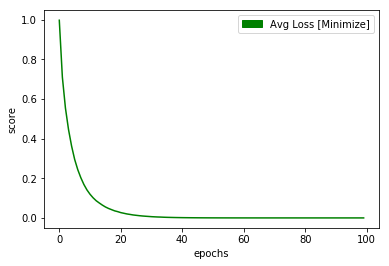

In [12]:
# set up legend
green_patch = mpatches.Patch(color='green', label='Avg Loss [Minimize]')
plt.legend(handles=[green_patch])

#plot the data
plt.plot(history.history['loss'], color='green')

plt.xlabel('epochs')
plt.ylabel('score');

##### SAVE MODEL FOR FUTURE RESTORE

In [13]:
import os

# create dir folders if they don't exits
os.makedirs('output/keras_checkpoints', exist_ok=True)

# save the trained model
model.save('output/keras_checkpoints/mlp_wine_keras.h5')

##### LOAD PRETRAINED MODEL

In [14]:
model.load_weights('output/keras_checkpoints/mlp_wine_keras.h5')

##### TESTING PRETRAINED MODEL

In [15]:
dataframe = pd.DataFrame(np.argmax(predictions,1), columns=['Prediction'])
dataframe['Target'] = np.argmax(y_test, 1)
dataframe['Hit'] = np.equal(dataframe.Target, dataframe.Prediction)
print('\n\nPrinting results :\n\n', dataframe)



Printing results :

     Prediction  Target   Hit
0            2       2  True
1            0       0  True
2            2       2  True
3            1       1  True
4            1       1  True
5            1       1  True
6            2       2  True
7            0       0  True
8            1       1  True
9            1       1  True
10           0       0  True
11           0       0  True
12           2       2  True
13           1       1  True
14           2       2  True
15           1       1  True
16           1       1  True
17           0       0  True
18           0       0  True
19           1       1  True
20           2       2  True
21           1       1  True
22           0       0  True
23           0       0  True
24           2       2  True
25           1       1  True
26           2       2  True
27           1       1  True
28           0       0  True
29           2       2  True
30           1       1  True
31           1       1  True
32           0      